In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("ADNIMERGE.csv")

In [4]:
interesting_cols = ['RID','EXAMDATE','DX_bl','DX','AGE','PTGENDER','ADAS11','ADAS13','FAQ','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting']

subset = data[interesting_cols]

subset[subset['RAVLT_perc_forgetting'] > 75]
data.shape

(13017, 94)

In [5]:
sns.set_context()
# fig, ax = plt.subplots(1,1,figsize = (15,15))

tiny = subset[['DX_bl','FAQ']]
tiny = tiny.dropna(axis=0,how='any')

In [6]:
tiny.shape

(9198, 2)

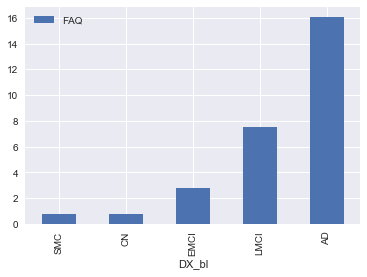

In [7]:
tiny.groupby(by="DX_bl").mean().sort_values(by="FAQ").plot(kind="bar")

In [8]:
data[['RID','DX','COLPROT','ORIGPROT','EXAMDATE']].head()

,RID,DX,COLPROT,ORIGPROT,EXAMDATE
0,2,CN,ADNI1,ADNI1,2005-09-08
1,3,Dementia,ADNI1,ADNI1,2005-09-12
2,3,Dementia,ADNI1,ADNI1,2006-03-13
3,3,Dementia,ADNI1,ADNI1,2006-09-12
4,3,Dementia,ADNI1,ADNI1,2007-09-12


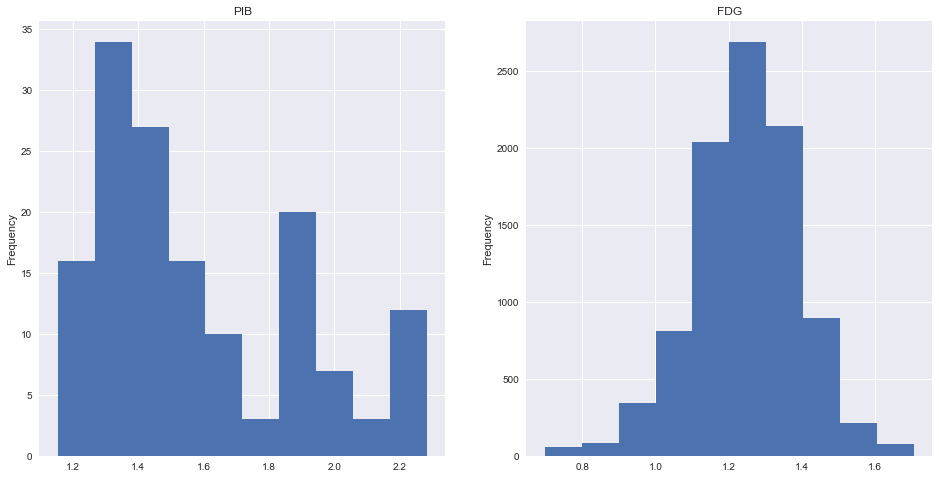

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
data['PIB_bl'].plot(kind='hist',ax=ax[0])
ax[0].set_title('PIB')
data['FDG_bl'].plot(kind='hist',ax=ax[1])
ax[1].set_title('FDG')

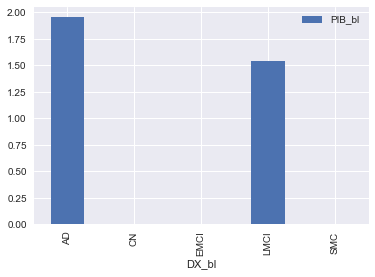

In [10]:
data[['DX_bl','PIB_bl']].groupby(by='DX_bl').mean().plot(kind="bar")

In [11]:
#masks
ad = data[data['DX_bl'] == 'AD']
cn = data[data['DX_bl'] == 'CN']
emci = data[data['DX_bl'] == 'EMCI']
lmci = data[data['DX_bl'] == 'LMCI']
smc = data[data['DX_bl'] == 'SMC']

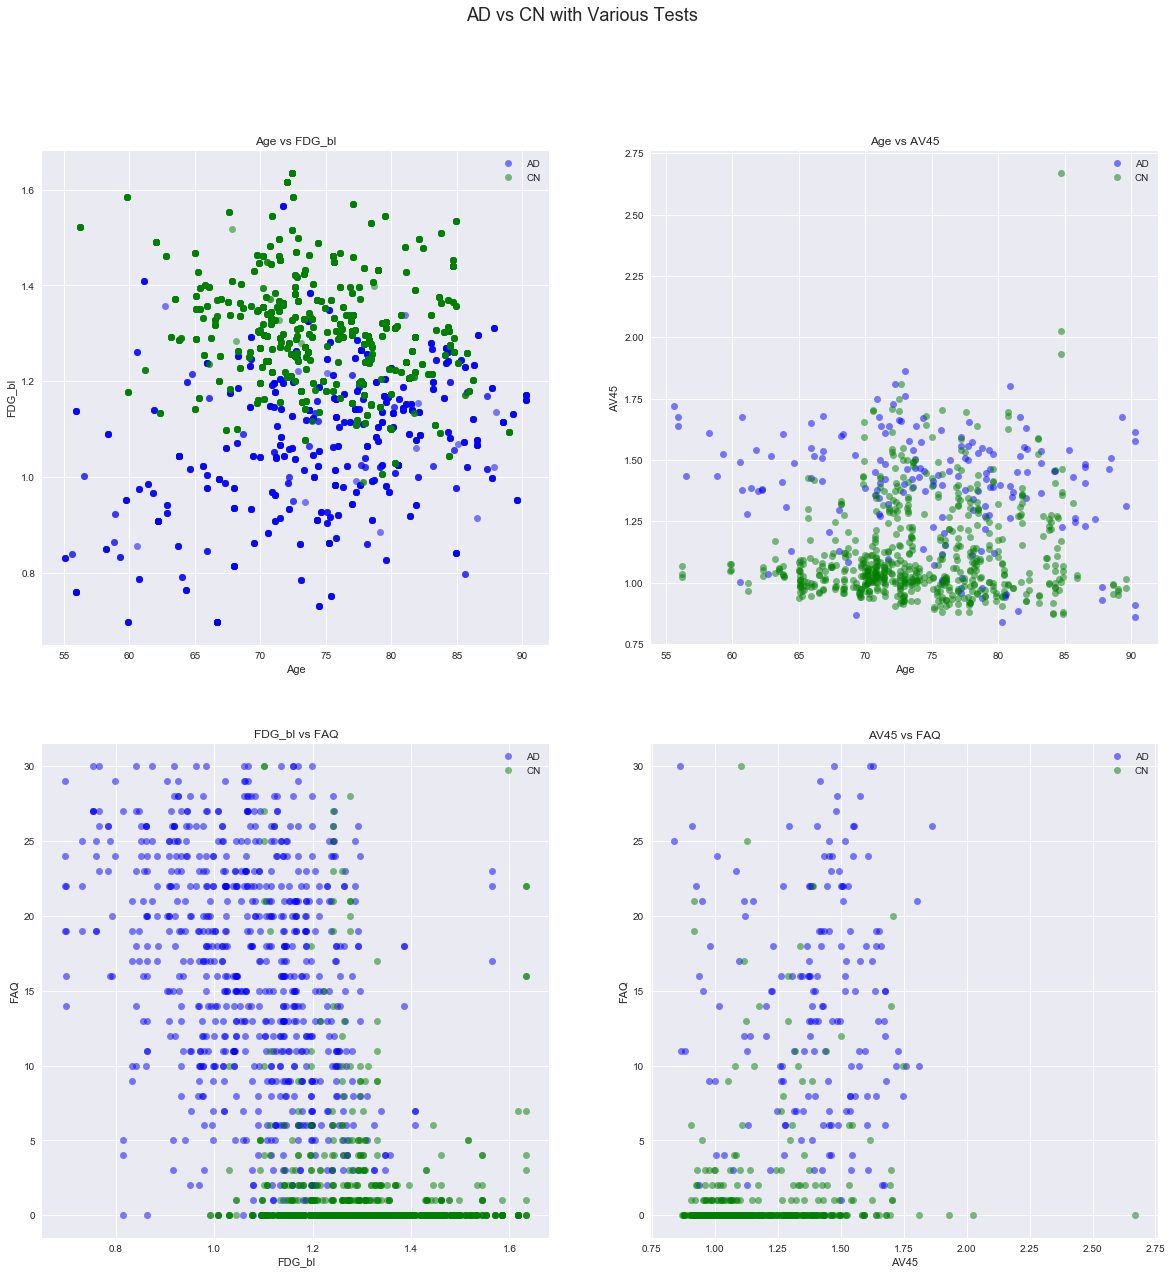

In [12]:
fig, ax = plt.subplots(2,2,figsize = (20,20))
fig.suptitle("AD vs CN with Various Tests", fontsize=18)
#I'm color blind, so red vs green is hard for me.
ax[0,0].plot(ad.AGE,ad.FDG_bl,"o",color='blue',alpha=.5,label='AD')
ax[0,0].plot(cn.AGE,cn.FDG_bl,"o",color='green',alpha=.5,label = 'CN')
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('FDG_bl')
ax[0,0].set_title('Age vs FDG_bl')
ax[0,0].legend(loc='best')

ax[0,1].plot(ad.AGE,ad.AV45,"o",color='blue',alpha=.5,label='AD')
ax[0,1].plot(cn.AGE,cn.AV45,"o",color='green',alpha=.5,label = 'CN')
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('AV45')
ax[0,1].set_title('Age vs AV45')
ax[0,1].legend(loc='best')

ax[1,1].plot(ad.AV45,ad.FAQ,"o",color='blue',alpha=.5,label='AD')
ax[1,1].plot(cn.AV45,cn.FAQ,"o",color='green',alpha=.5,label = 'CN')
ax[1,1].set_xlabel('AV45')
ax[1,1].set_ylabel('FAQ')
ax[1,1].set_title('AV45 vs FAQ')
ax[1,1].legend(loc='best')

ax[1,0].plot(ad.FDG_bl,ad.FAQ,"o",color='blue',alpha=.5,label='AD')
ax[1,0].plot(cn.FDG_bl,cn.FAQ,"o",color='green',alpha=.5,label = 'CN')
ax[1,0].set_xlabel('FDG_bl')
ax[1,0].set_ylabel('FAQ')
ax[1,0].set_title('FDG_bl vs FAQ')
ax[1,0].legend(loc='best')

In [13]:
by_RID = data.sort_values(["RID","EXAMDATE"])
by_RID = by_RID.reset_index(drop=True)
by_RID.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
1,2,011_S_0002,m06,11,ADNI1,ADNI1,2006-03-06,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.490075,5.86885,6,6,2017-08-13 23:50:48.0
2,2,011_S_0002,m36,11,ADNI1,ADNI1,2008-08-27,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,2.967830,35.54100,36,36,2017-08-13 23:50:48.0
3,2,011_S_0002,m60,11,ADNIGO,ADNI1,2010-09-22,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,5.037650,60.32790,60,60,2017-08-13 23:50:48.0
4,2,011_S_0002,m66,11,ADNIGO,ADNI1,2011-03-04,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,5.483920,65.67210,66,66,2017-08-13 23:50:48.0


In [14]:
ids = by_RID['RID'].unique()

In [15]:
counter = 0
indeces = []
for row in range(len(by_RID)):
    if by_RID['RID'][row] == ids[counter+1]:
#         print(by_RID['RID'][row], by_RID['RID'][row+1])
        indeces.append(row-1)
#         if by_RID['RID'][row] == by_RID['RID'][row+1]:
#             indeces.append(row)
        counter += 1
last_exam = by_RID.iloc[indeces]

In [16]:
print("Percent left after removing longitudinal data: ", (last_exam.shape[0]/data.shape[0])*100)

Percent left after removing longitudinal data:  13.697472535914573


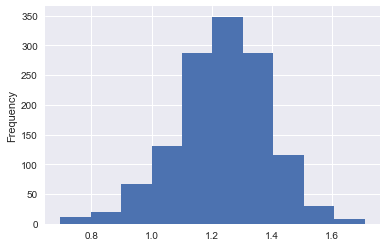

In [17]:
last_exam['FDG_bl'].plot(kind="hist")

In [18]:
ad2 = last_exam[last_exam['DX_bl']=='AD']
cn2 = last_exam[last_exam['DX_bl']=='CN']

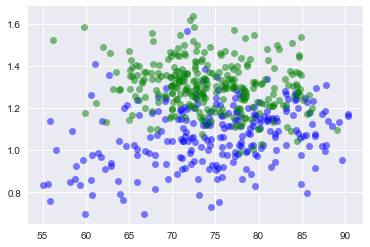

In [19]:
plt.plot(ad2.AGE,ad2.FDG_bl,"o",color="blue",alpha=.5)
plt.plot(cn2.AGE,cn2.FDG_bl,"o",color="green",alpha=.5)

In [20]:
last_exam = pd.get_dummies(last_exam, columns=['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY'], drop_first=True)

In [21]:
cols = list(last_exam)
# cols

/Users/agasthyapradhan-shenoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agasthyapradhan-shenoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


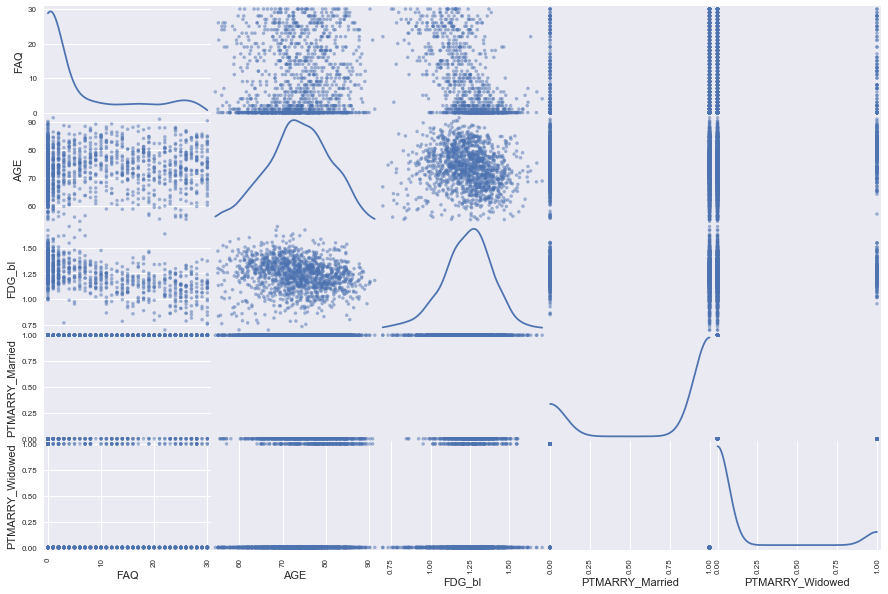

In [22]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(last_exam[['DX_bl','FAQ','AGE','FDG_bl','PTMARRY_Married','PTMARRY_Widowed']], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

In [23]:
small = last_exam[['DX_bl','FAQ','AGE','FDG_bl','PTMARRY_Married','MMSE','AV45']]

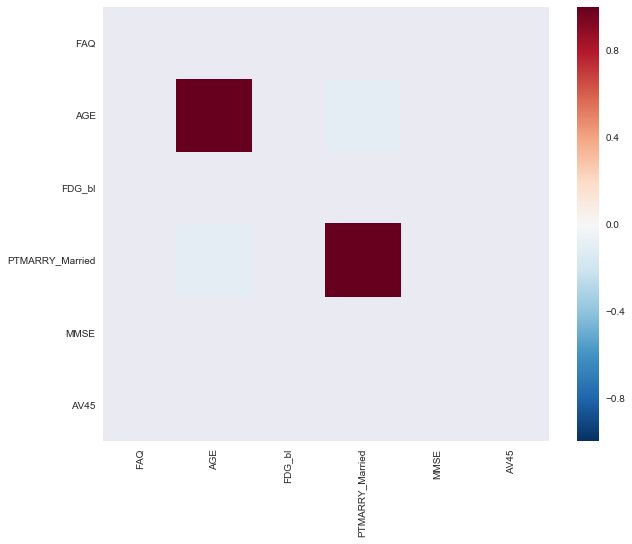

In [24]:
interesting_columns = small.drop('DX_bl', axis=1).columns
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(small.drop('DX_bl', axis=1).T), ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.show()

In [25]:
from pandas.plotting import radviz

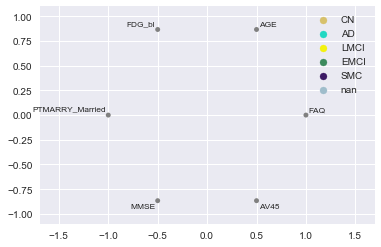

In [26]:
plt.figure()
radviz(small,'DX_bl')

In [27]:
# last_exam

In [28]:
last_exam[last_exam.DX.isnull()].head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTEDUCAT,...,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never married,PTMARRY_Unknown,PTMARRY_Widowed
13,2,011_S_0002,m126,11,ADNI2,ADNI1,2016-06-23,CN,74.3,16,...,0,0,0,0,0,1,1,0,0,0
77,15,100_S_0015,m78,100,ADNI2,ADNI1,2012-04-10,CN,80.8,18,...,0,0,0,0,0,1,1,0,0,0
127,23,011_S_0023,m120,11,ADNI2,ADNI1,2015-12-21,CN,71.7,14,...,0,1,0,0,0,0,0,0,0,1
182,35,100_S_0035,m120,100,ADNI2,ADNI1,2016-11-21,CN,76.9,18,...,0,0,0,0,0,1,1,0,0,0
218,42,023_S_0042,m102,23,ADNI2,ADNI1,2014-05-12,LMCI,72.8,18,...,0,0,0,0,0,1,1,0,0,0


In [29]:
by_RID['SITE'].describe()
# cols

count    13017.000000
mean        73.892064
std        110.533877
min          2.000000
25%         21.000000
50%         41.000000
75%        116.000000
max        941.000000
Name: SITE, dtype: float64

In [30]:
brains = last_exam[last_exam.Ventricles.isnull() == False][['DX_bl','Ventricles', 'Hippocampus','WholeBrain','Entorhinal','Fusiform','MidTemp','ICV','FAQ','RAVLT_perc_forgetting','MMSE']]

/Users/agasthyapradhan-shenoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
/Users/agasthyapradhan-shenoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


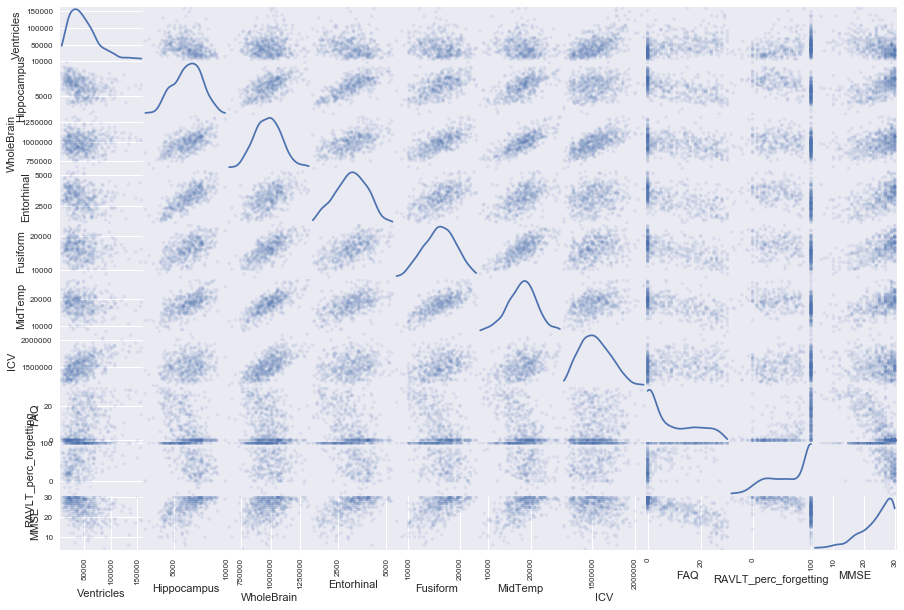

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(brains, alpha=0.1, diagonal='kde', ax=ax)
plt.show()

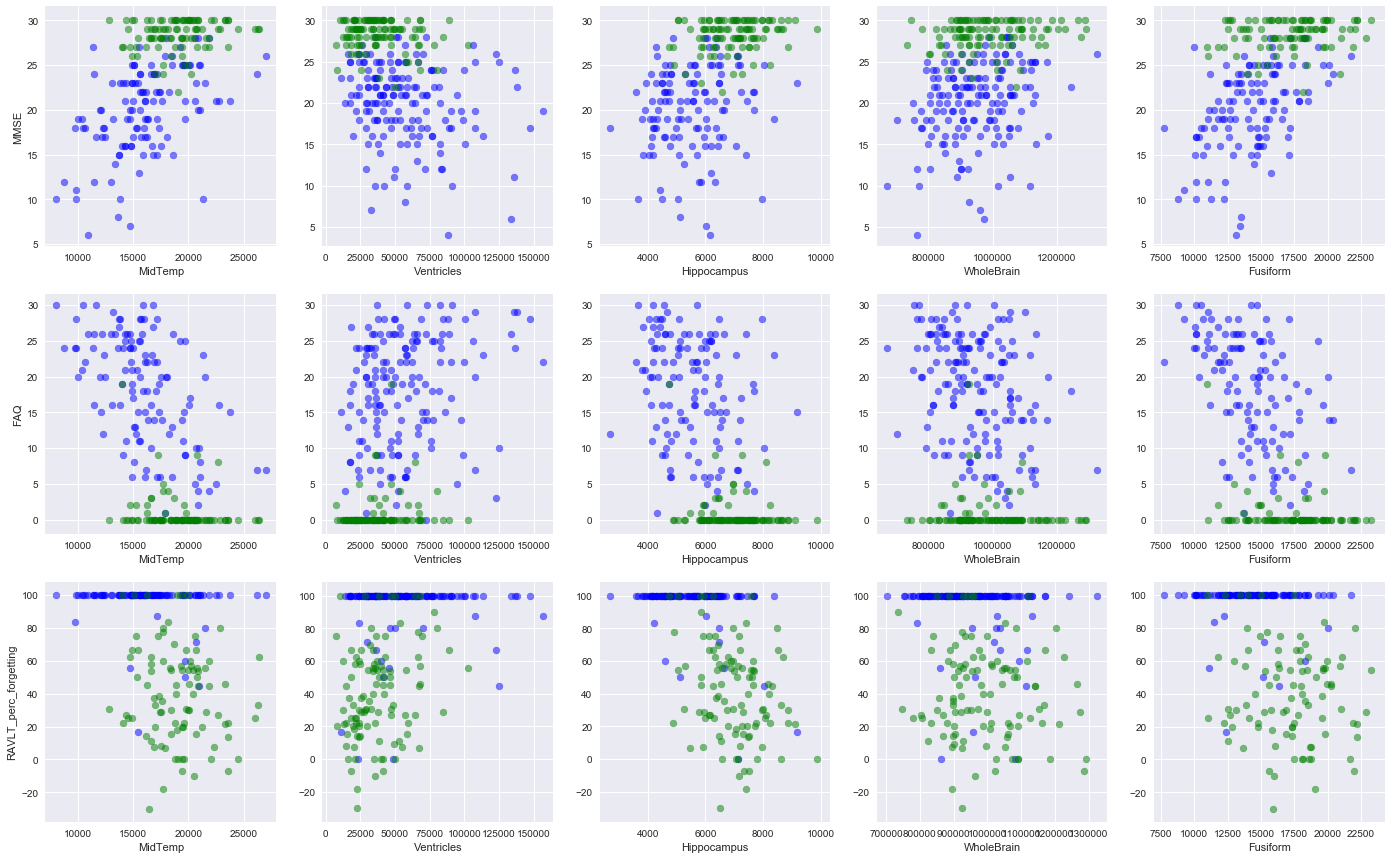

In [32]:
fig,ax = plt.subplots(3,5,figsize=(24,15))

#MMSE
ax[0,0].set_ylabel("MMSE")
ax[0,0].scatter(brains.MidTemp[brains.DX_bl == 'AD'],brains.MMSE[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[0,0].scatter(brains.MidTemp[brains.DX_bl == 'CN'],brains.MMSE[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[0,0].set_xlabel("MidTemp")

ax[0,1].scatter(brains.Ventricles[brains.DX_bl == 'AD'],brains.MMSE[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[0,1].scatter(brains.Ventricles[brains.DX_bl == 'CN'],brains.MMSE[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[0,1].set_xlabel("Ventricles")

ax[0,2].scatter(brains.Hippocampus[brains.DX_bl == 'AD'],brains.MMSE[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[0,2].scatter(brains.Hippocampus[brains.DX_bl == 'CN'],brains.MMSE[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[0,2].set_xlabel("Hippocampus")

ax[0,3].scatter(brains.WholeBrain[brains.DX_bl == 'AD'],brains.MMSE[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[0,3].scatter(brains.WholeBrain[brains.DX_bl == 'CN'],brains.MMSE[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[0,3].set_xlabel("WholeBrain")

ax[0,4].scatter(brains.Fusiform[brains.DX_bl == 'AD'],brains.MMSE[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[0,4].scatter(brains.Fusiform[brains.DX_bl == 'CN'],brains.MMSE[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[0,4].set_xlabel("Fusiform")

#FAQ
ax[1,0].set_ylabel("FAQ")
ax[1,0].scatter(brains.MidTemp[brains.DX_bl == 'AD'],brains.FAQ[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[1,0].scatter(brains.MidTemp[brains.DX_bl == 'CN'],brains.FAQ[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[1,0].set_xlabel("MidTemp")

ax[1,1].scatter(brains.Ventricles[brains.DX_bl == 'AD'],brains.FAQ[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[1,1].scatter(brains.Ventricles[brains.DX_bl == 'CN'],brains.FAQ[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[1,1].set_xlabel("Ventricles")

ax[1,2].scatter(brains.Hippocampus[brains.DX_bl == 'AD'],brains.FAQ[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[1,2].scatter(brains.Hippocampus[brains.DX_bl == 'CN'],brains.FAQ[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[1,2].set_xlabel("Hippocampus")

ax[1,3].scatter(brains.WholeBrain[brains.DX_bl == 'AD'],brains.FAQ[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[1,3].scatter(brains.WholeBrain[brains.DX_bl == 'CN'],brains.FAQ[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[1,3].set_xlabel("WholeBrain")

ax[1,4].scatter(brains.Fusiform[brains.DX_bl == 'AD'],brains.FAQ[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[1,4].scatter(brains.Fusiform[brains.DX_bl == 'CN'],brains.FAQ[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[1,4].set_xlabel("Fusiform")

#RAVLT_perc_forgetting
ax[2,0].set_ylabel("RAVLT_perc_forgetting")
ax[2,0].scatter(brains.MidTemp[brains.DX_bl == 'AD'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[2,0].scatter(brains.MidTemp[brains.DX_bl == 'CN'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[2,0].set_xlabel("MidTemp")

ax[2,1].scatter(brains.Ventricles[brains.DX_bl == 'AD'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[2,1].scatter(brains.Ventricles[brains.DX_bl == 'CN'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[2,1].set_xlabel("Ventricles")

ax[2,2].scatter(brains.Hippocampus[brains.DX_bl == 'AD'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[2,2].scatter(brains.Hippocampus[brains.DX_bl == 'CN'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[2,2].set_xlabel("Hippocampus")

ax[2,3].scatter(brains.WholeBrain[brains.DX_bl == 'AD'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[2,3].scatter(brains.WholeBrain[brains.DX_bl == 'CN'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[2,3].set_xlabel("WholeBrain")

ax[2,4].scatter(brains.Fusiform[brains.DX_bl == 'AD'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'AD'],color = "blue",alpha=.5)
ax[2,4].scatter(brains.Fusiform[brains.DX_bl == 'CN'],brains.RAVLT_perc_forgetting[brains.DX_bl == 'CN'],color = "green",alpha=.5)
ax[2,4].set_xlabel("Fusiform")

In [33]:
brains['FDG_bl'] = last_exam.FDG_bl
brains['PIB_bl'] = last_exam.PIB_bl
brains['AV45'] = last_exam.AV45


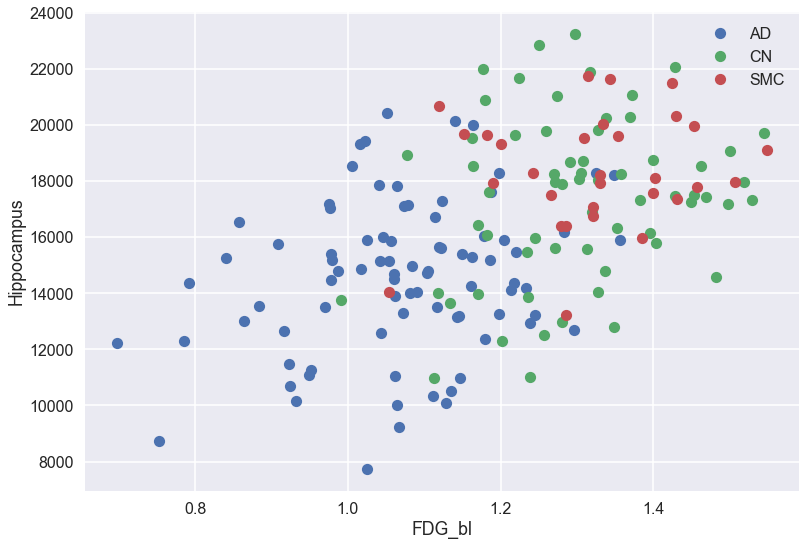

In [34]:
sns.set_context("poster")
plt.plot(brains.FDG_bl[brains.DX_bl == 'AD'],brains.Fusiform[brains.DX_bl == 'AD'],"o",label="AD")
plt.plot(brains.FDG_bl[brains.DX_bl == 'CN'],brains.Fusiform[brains.DX_bl == 'CN'],"o",label="CN")
plt.plot(brains.FDG_bl[brains.DX_bl == 'SMC'],brains.Fusiform[brains.DX_bl == 'SMC'],"o",label="SMC")
plt.legend(loc='best')
plt.xlabel("FDG_bl")
plt.ylabel("Hippocampus")

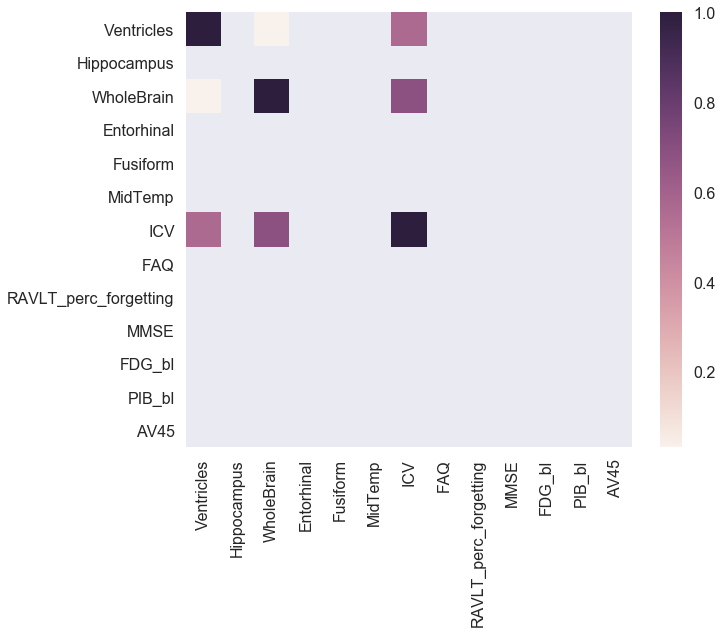

In [35]:
interesting_columns = brains.drop('DX_bl', axis=1).columns
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(brains.drop('DX_bl', axis=1).T), ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.show()

In [36]:
data[data.VISCODE=='bl'].shape

(1784, 94)

In [37]:
counter = 0
indeces = []
for row in range(len(by_RID)):
    if by_RID['RID'][row] == ids[counter+1]:
#         print(by_RID['RID'][row], by_RID['RID'][row+1])
        indeces.append(row-1)
#         if by_RID['RID'][row] == by_RID['RID'][row+1]:
#             indeces.append(row)
        counter += 1
last = by_RID.iloc[indeces]

In [38]:
first = data[data.VISCODE=='bl']
first_last = first.append(last,ignore_index=True)

In [39]:
first_last.shape

(3567, 94)

In [40]:
first_last = first_last.sort_values(by=["RID","EXAMDATE"])

In [45]:
first_last = first_last.reset_index(drop=True)
first_last[['RID','EXAMDATE','FAQ_bl','MMSE','DX_bl']].head(25)

,RID,EXAMDATE,FAQ_bl,MMSE,DX_bl
0,2,2005-09-08,0.0,28.0,CN
1,2,2016-06-23,0.0,NaN,CN
2,3,2005-09-12,10.0,20.0,AD
3,3,2007-09-12,10.0,19.0,AD
4,4,2005-11-08,0.0,27.0,LMCI
5,4,2008-11-18,0.0,25.0,LMCI
6,5,2005-09-07,0.0,29.0,CN
7,5,2008-09-10,0.0,30.0,CN
8,6,2005-11-29,0.0,25.0,LMCI
9,6,2008-12-08,0.0,22.0,LMCI
